In [12]:
from pathlib import Path
import os
from docling_optimize.config.models import Config
from pydantic import BaseModel, ValidationError
import yaml
import logging

from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.base_models import InputFormat
from docling.pipeline.standard_pdf_pipeline import StandardPdfPipeline
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions
)
from docling_core.transforms.serializer.markdown import MarkdownDocSerializer

from docling_optimize.pymupdf_backend import PyMuPDFDocumentBackend

logger = logging.getLogger("DoclingExtractor")

In [15]:
def _load_config(config_path: str | os.PathLike) -> Config:
    """Load configurations file."""
    path = Path(config_path)
    try:
        with path.open("r") as file:
            data = yaml.safe_load(file)
        return Config(**data)
    except (FileNotFoundError, ValidationError) as e:
        logger.error(f"Configuration error: {e}")
        raise


config_path = "../src/docling_optimize/config/app_config.yml"


config = _load_config(config_path)

converter = DocumentConverter(
    format_options={

        InputFormat.PDF: PdfFormatOption(
            pipline_cls=StandardPdfPipeline, 
            pipeline_options=PdfPipelineOptions(artifacts_path=Path(config.models.docling_path),
                                                                    do_ocr=False, 
                                                                    force_backend_text=True,
                                                                    # accelerator_options=accelerator_options
                                                                    do_table_structure = True,
                                                                    generate_picture_images=True
                                                                    ),
            # backend = DoclingParseV4DocumentBackend
            backend = PyMuPDFDocumentBackend
        ),
    }
)

In [17]:
filepath="../data/pdf/inputs/example_1.pdf"

doc = converter.convert(source=Path(filepath)).document

2026-01-08 17:07:28,979 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-08 17:07:28,992 - INFO - Parsing the document with PyMuPDF
2026-01-08 17:07:29,026 - INFO - Going to convert document batch...
2026-01-08 17:07:29,095 - INFO - Processing document example_1.pdf
2026-01-08 17:07:59,670 - INFO - Finished converting document example_1.pdf in 30.70 sec.


[PictureItem(self_ref='#/pictures/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, meta=None, label=<DocItemLabel.PICTURE: 'picture'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=35.235103607177734, t=53.997314453125, r=105.82376861572266, b=38.8603515625, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], comments=[], captions=[], references=[], footnotes=[], image=ImageRef(mimetype='image/png', dpi=72, size=Size(width=71.0, height=15.0), uri=AnyUrl('')), annotations=[]),
 PictureItem(self_ref='#/pictures/1', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, meta=None, label=<DocItemLabel.PICTURE: 'picture'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=419.63543701171875, t=628.1980285644531, r=575.779052734375, b=454.4794006347656, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], comments=[], captions=[], references=[], footnotes=[], image=ImageRe
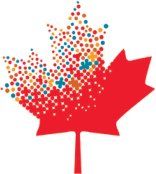
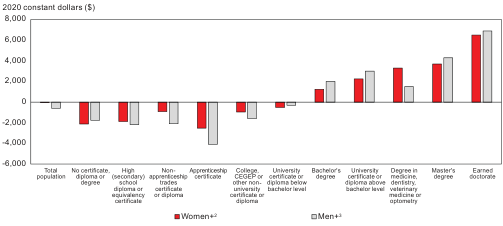
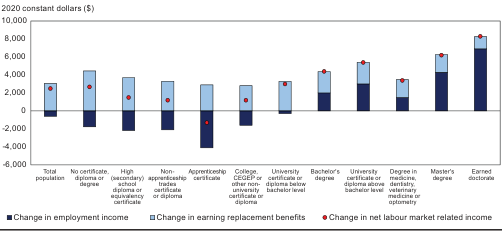
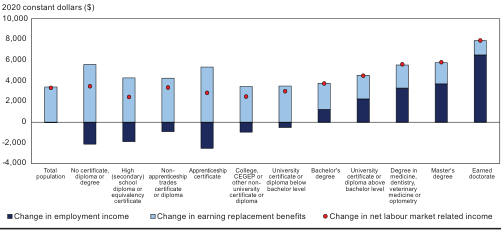

In [24]:
doc.pictures

In [19]:
import os
import multiprocessing

# Method 1: Get total CPU cores (logical processors)
total_cores = multiprocessing.cpu_count()
print(f"Total CPU cores: {total_cores}")

# Method 2: Get physical CPU cores (more conservative)
try:
    physical_cores = len(os.sched_getaffinity(0))  # On Linux
    print(f"Available CPU cores: {physical_cores}")
except AttributeError:
    # Fallback for non-Linux systems
    physical_cores = os.cpu_count() or total_cores
    print(f"CPU cores (fallback): {physical_cores}")

# Method 3: Check current OMP_NUM_THREADS setting
current_omp_threads = os.getenv('OMP_NUM_THREADS')
print(f"Current OMP_NUM_THREADS: {current_omp_threads}")

Total CPU cores: 2
CPU cores (fallback): 2
Current OMP_NUM_THREADS: None
